In [1]:
import numpy as np
import strawberryfields as sf
from strawberryfields.ops import *
import matplotlib.pyplot as plt
import time

In [2]:
start = time.time()
#np.random.seed(69)
boson_sampling1 = sf.Program(4) 

with boson_sampling1.context as q:
    # prepare the input fock states
    Fock(1) | q[0]
    Fock(1) | q[1]
    Fock(1) | q[2]
    Vac     | q[3]

    # rotation gates
    Rgate(0.5719)  | q[0]
    Rgate(-1.9782) | q[1]
    Rgate(2.0603)  | q[2]
    Rgate(0.0644)  | q[3]

    # beamsplitter array
    BSgate(0.7804, 0.8578)  | (q[0], q[1])
    BSgate(0.06406, 0.5165) | (q[2], q[3])
    BSgate(0.473, 0.1176)   | (q[1], q[2])
    BSgate(0.563, 0.1517)   | (q[0], q[1])
    BSgate(0.1323, 0.9946)  | (q[2], q[3])
    BSgate(0.311, 0.3231)   | (q[1], q[2])
    BSgate(0.4348, 0.0798)  | (q[0], q[1])
    BSgate(0.4368, 0.6157)  | (q[2], q[3])

eng1 = sf.Engine(backend="fock", backend_options={"cutoff_dim": 7})

# We can now execute the program with the engine:
results1 = eng1.run(boson_sampling1, shots=400000)

# extract the joint Fock probabilities
probs1 = results1.state.all_fock_probs()
end = time.time()
#boson_sampling1.compile(compiler="fock").print()
time1=end-start
print("The execution time for Samplers is :", time1)

The execution time for Samplers is : 25.257760524749756


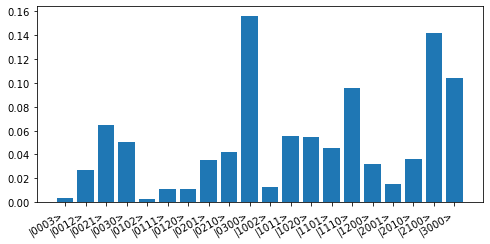

In [3]:

probs1_arr = []
state1 = []
ket1 = []
ket2 = []

for i in range(0,4):
    for j in range(0,4):
        for k in range(0,4):
            for l in range(0,4):
                if probs1[i, j, k, l] != 0:
                    probs1_arr.append(probs1[i, j, k, l])
                    state1.append([i,j,k,l])
                    ket1.append("|" + str(i) +  str(j) +  str(k) +  str(l) + ">")
                    ket2.append(str(i) +  str(j) +  str(k) +  str(l))
                    #print(ket1[-1] + ":" , probs1[i, j, k, l])

fig = plt.figure(figsize=(8,4))                    
plt.bar(ket1, probs1_arr)
fig.autofmt_xdate()
plt.show()


In [4]:
start = time.time()
coding = ''
for i in range(len(ket2)):
    for j in range(len(ket2[0])):
        if i == 19: break
        if (int(ket2[i][j]) == 0) & (int(ket2[i+1][j]) == 0):
            if j == 3:
                coding = coding + ("/")
                break
        elif (int(ket2[i][j]) == 0) & (int(ket2[i+1][j]) != 0):
            coding = coding + '1'
            if j == 3:
                coding = coding + ("/")
                break
        elif (int(ket2[i][j]) != 0) & (int(ket2[i+1][j]) == 0):
            coding = coding + '0'
            if j == 3:
                coding = coding + ("/")
                break
        elif (int(ket2[i][j]) != 0) & (int(ket2[i+1][j]) != 0):
            if j == 3:
                coding = coding + ("/")
                break
#print(coding)
end = time.time()
time2=end-start
print("The time of execution of Von-Nuemann is :", time2)

print("Total execution time is :",time1+time2 )

The time of execution of Von-Nuemann is : 0.000997781753540039
Total execution time is : 25.258758306503296


In [5]:
ccoding = coding.split("/")

In [9]:
res = {}
for i in ccoding:
    res[i] = ccoding.count(i)
print(res)

{'1': 3, '': 2, '0': 6, '101': 3, '01': 2, '10': 4}


In [10]:
del res['']
#print(res)

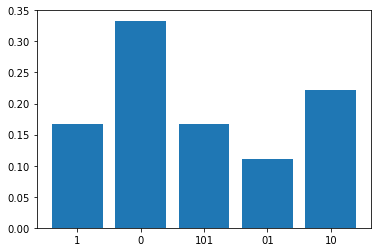

In [11]:
names = list(res.keys())
values = list(res.values())
sumv = 0
for elem in range(len(values)):
    sumv = sumv + values[elem]
for elem in range(len(values)):
    values[elem] = values[elem]/sumv
#print(values)
plt.bar(range(len(res)), values, tick_label=names)
plt.show()